In [1]:
import shutil
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
import os
import requests
import sklearn as sc
from zipfile import ZipFile
import category_encoders as ce
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import collections
from scipy import stats
import matplotlib.ticker as mtick
import category_encoders as ce
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
import collections
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
#Simple Imputer
from sklearn.impute import SimpleImputer

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
df = pd.read_csv('CC GENERAL.csv', encoding='utf-8')

#(file, delimiter = ";")

### Data Understanding

In [5]:
df.head(2)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12


In [6]:
df.shape

(8950, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [8]:
df.isnull().sum()
#df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
df.set_index('CUST_ID', inplace = True)

In [10]:
# Summary statistics for all variables
summary=df.describe(include='all')
summary=summary.transpose()
summary.head(len(summary))

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


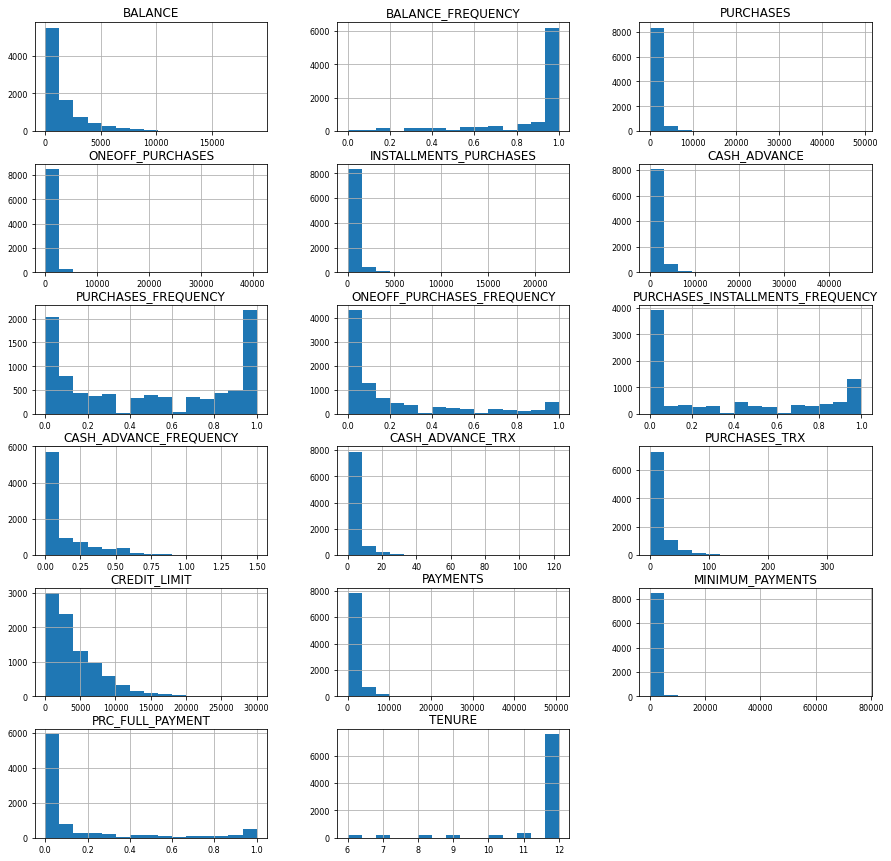

In [11]:
# Do histograms on all numeric variables
numerical=df.select_dtypes(include=[np.number]).columns.tolist()
df[numerical].hist(bins=15, figsize=(15, 15), layout=(6, 3), xlabelsize=8, ylabelsize=8);

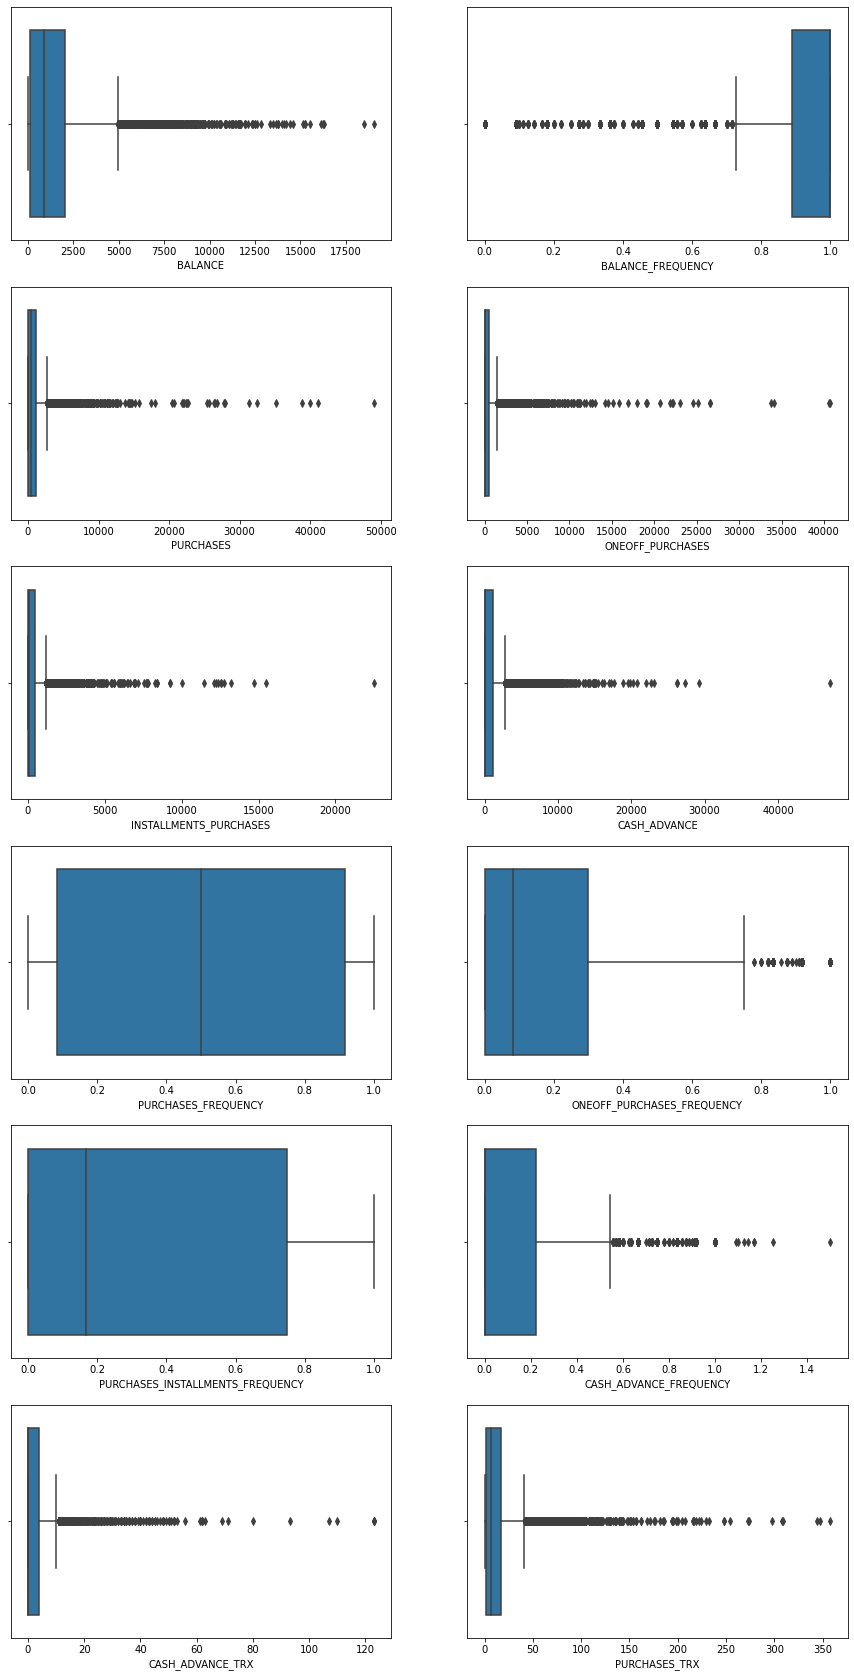

In [12]:
# Do boxplots on all numeric variables
fig, ax = plt.subplots(6, 2, figsize=(15, 30))
for var, subplot in zip(df[numerical], ax.flatten()):
    sns.boxplot(df[var], ax=subplot)

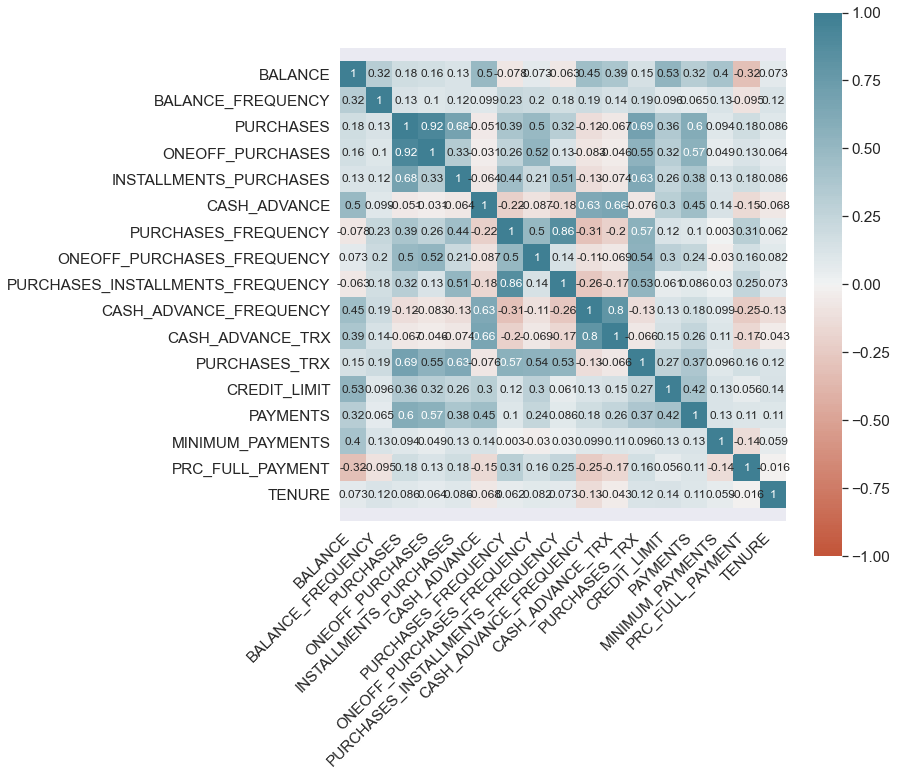

In [13]:
# Plot correlation heatmap of all numeric variables
corr = df[numerical].corr()
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.4)
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True, annot_kws={"size": 12}
)
bottom, top = ax.get_ylim() # These two lines were added due to bug on current Seaborn version
ax.set_ylim(bottom + 0.5, top - 0.5) #
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [14]:
dataCorr = df.corr()
dataCorr = dataCorr.mask(np.tril(np.ones(dataCorr.shape)).astype(np.bool))

correlation_mat = dataCorr

corr_pairs = correlation_mat.unstack()

sorted_pairs = corr_pairs.sort_values(kind="quicksort")

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.8 ]

strong_pairs2 = sorted_pairs[abs(sorted_pairs) < -0.8 ]

print('correlations over/under 0.8 in the following variables:', "\n", strong_pairs,"\n", strong_pairs2)

correlations over/under 0.8 in the following variables: 
 PURCHASES_INSTALLMENTS_FREQUENCY  PURCHASES_FREQUENCY    0.862934
ONEOFF_PURCHASES                  PURCHASES              0.916845
dtype: float64 
 Series([], dtype: float64)


In [15]:
df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

## Data Preparation

In [16]:
# Create a modeling dataset from the original dataset
X = df.copy(deep=True)

In [17]:
#Find Duplicated Rows

duplicate = X[X.duplicated()] 
  
print("Duplicate Rows :") 
  
# Print the resultant Dataframe 
duplicate 

Duplicate Rows :


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,


#### Outliers

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8950 entries, C10001 to C19190
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CRED

In [19]:
#Copy of DataSet

X_Safe = X
X = df

#### Missing Values Imputation

In [20]:
X.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

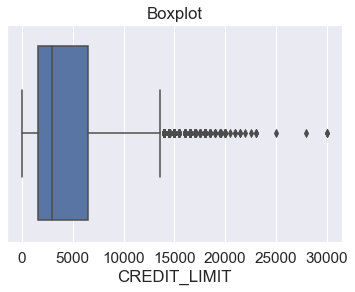

In [21]:
#CREDIT_LIMIT

#Plot data prior to the transformation
sns.boxplot(X['CREDIT_LIMIT'])
plt.title("Boxplot")
plt.show()

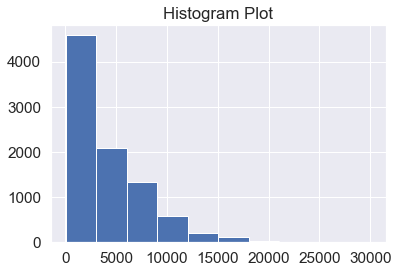

In [22]:
X.hist(column='CREDIT_LIMIT')
plt.title("Histogram Plot")
plt.show()

In [23]:
#As it is one value and not a normal distribution, input median

median = X['CREDIT_LIMIT'].median()
X['CREDIT_LIMIT'].fillna(value = median, inplace = True)

In [24]:
# MINIMUM_PAYMENTS

#Plot data prior to the transformation   
X.dropna(subset=['MINIMUM_PAYMENTS'], inplace = True)

In [25]:
X.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [46]:
print('correlations over/under 0.8 in the following variables:', "\n", strong_pairs,"\n", strong_pairs2)

correlations over/under 0.8 in the following variables: 
 PURCHASES_INSTALLMENTS_FREQUENCY  PURCHASES_FREQUENCY    0.862934
ONEOFF_PURCHASES                  PURCHASES              0.916845
dtype: float64 
 Series([], dtype: float64)


In [26]:
# Remove columns that are correlated

cols = ['ONEOFF_PURCHASES', 'PURCHASES_INSTALLMENTS_FREQUENCY']
X.drop(columns=cols, inplace=True)

##### Feature Engeneering

#### Binning

In [27]:
safe_dataset = X

binned_dataset = X

In [28]:
#Função para Binning

def binning (df, field_name):
    df[field_name+'_BINS'] = pd.qcut(df[field_name].rank(method='first'), q=4)
    df.drop(columns = [field_name], inplace = True)
    return X

In [29]:
#Variáveis to BIN

cols = ['BALANCE','PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE',
        'CASH_ADVANCE_TRX','PURCHASES_TRX','PAYMENTS', 'MINIMUM_PAYMENTS']

In [30]:
for i in cols:
    binned_dataset = binning(binned_dataset, i)

In [31]:
binned_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8637 entries, C10001 to C19190
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   BALANCE_FREQUENCY            8637 non-null   float64 
 1   PURCHASES_FREQUENCY          8637 non-null   float64 
 2   ONEOFF_PURCHASES_FREQUENCY   8637 non-null   float64 
 3   CASH_ADVANCE_FREQUENCY       8637 non-null   float64 
 4   CREDIT_LIMIT                 8637 non-null   float64 
 5   PRC_FULL_PAYMENT             8637 non-null   float64 
 6   TENURE                       8637 non-null   int64   
 7   BALANCE_BINS                 8637 non-null   category
 8   PURCHASES_BINS               8637 non-null   category
 9   INSTALLMENTS_PURCHASES_BINS  8637 non-null   category
 10  CASH_ADVANCE_BINS            8637 non-null   category
 11  CASH_ADVANCE_TRX_BINS        8637 non-null   category
 12  PURCHASES_TRX_BINS           8637 non-null   category
 13  P

In [32]:
#ONLY BINNED VARIABLBES
cols = list(binned_dataset.select_dtypes(['category']).astype(str))
cols

['BALANCE_BINS',
 'PURCHASES_BINS',
 'INSTALLMENTS_PURCHASES_BINS',
 'CASH_ADVANCE_BINS',
 'CASH_ADVANCE_TRX_BINS',
 'PURCHASES_TRX_BINS',
 'PAYMENTS_BINS',
 'MINIMUM_PAYMENTS_BINS']

In [33]:
# Encode categorical variables to dummy variables
df_dummies = pd.get_dummies(binned_dataset, columns=cols)
df_dummies.head()

,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PRC_FULL_PAYMENT,TENURE,"BALANCE_BINS_(0.999, 2160.0]","BALANCE_BINS_(2160.0, 4319.0]","BALANCE_BINS_(4319.0, 6478.0]",...,"PURCHASES_TRX_BINS_(4319.0, 6478.0]","PURCHASES_TRX_BINS_(6478.0, 8637.0]","PAYMENTS_BINS_(0.999, 2160.0]","PAYMENTS_BINS_(2160.0, 4319.0]","PAYMENTS_BINS_(4319.0, 6478.0]","PAYMENTS_BINS_(6478.0, 8637.0]","MINIMUM_PAYMENTS_BINS_(0.999, 2160.0]","MINIMUM_PAYMENTS_BINS_(2160.0, 4319.0]","MINIMUM_PAYMENTS_BINS_(4319.0, 6478.0]","MINIMUM_PAYMENTS_BINS_(6478.0, 8637.0]"
CUST_ID,,,,,,,,,,,,,,,,,,,,,
C10001,0.818182,0.166667,0.000000,0.00,1000.0,0.000000,12,1,0,0,...,0,0,1,0,0,0,1,0,0,0
C10002,0.909091,0.000000,0.000000,0.25,7000.0,0.222222,12,0,0,0,...,0,0,0,0,0,1,0,0,0,1
C10003,1.000000,1.000000,1.000000,0.00,7500.0,0.000000,12,0,0,0,...,1,0,0,1,0,0,0,0,1,0
C10005,1.000000,0.083333,0.083333,0.00,1200.0,0.000000,12,0,1,0,...,0,0,0,1,0,0,0,1,0,0
C10006,1.000000,0.666667,0.000000,0.00,1800.0,0.000000,12,0,0,1,...,1,0,0,0,1,0,0,0,0,1


In [34]:
# Get a copy of the dataframe before normalization
X = df_dummies
X_beforeNorm = df_dummies.copy(deep=True)

# Normalize all columns
cols = list(X.columns) # save the name of the columns
X_array = X.values # returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X_array)
X = pd.DataFrame(X_scaled, columns=cols)

#### Analyze Principal Components

In [35]:
# Let'start to visualizar with only two components
pca2 = PCA(n_components = 2)
pca2.fit(X)
X_pca2 = pca2.transform(X) # Apply the dimension reduction to the dataset
print(X_pca2.shape)

(8637, 2)


In [36]:
# Fit the PCA algorithm to data 
pca = PCA().fit(X)

# Show the variance per component
pcaevr = ['{:f}'.format(item) for item in pca.explained_variance_ratio_]
pcaDF = pd.DataFrame({'Component': range(1, len(X.columns)+1),
                      'Variance explained': pcaevr,
                      'Cumulative variance explained': np.cumsum(pca.explained_variance_ratio_)})
pcaDF

,Component,Variance explained,Cumulative variance explained
0,1,0.168469,0.168469
1,2,0.127559,0.296028
2,3,0.077385,0.373413
3,4,0.072692,0.446105
4,5,0.059883,0.505988
5,6,0.055969,0.561957
6,7,0.049390,0.611347
7,8,0.046499,0.657846
8,9,0.041730,0.699577
9,10,0.037334,0.736911


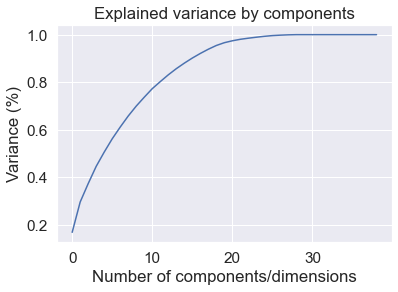

In [37]:
# Plot the cumulative explained variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components/dimensions')
plt.ylabel('Variance (%)')
plt.title('Explained variance by components')
plt.show()

### Modeling - K-Means

In [38]:
# Apply the dimension reduction to the dataset (for 15 components)
pca_reduced = PCA(n_components = 20)
pca_reduced.fit(X)
X_pca_reduced = pca_reduced.transform(X) 
print(X_pca_reduced.shape)

(8637, 20)


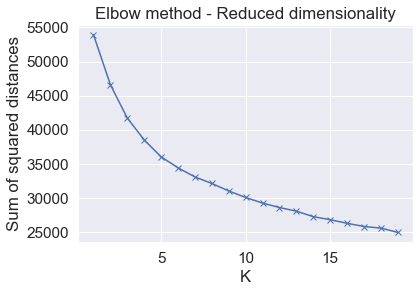

In [39]:
# Select K based on the sum of squared distances
ssd = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k, random_state=123)
    km = km.fit(X_pca_reduced)
    ssd.append(km.inertia_)
    
# Plot results
plt.plot(K, ssd, 'bx-')
plt.xlabel('K')
plt.ylabel('Sum of squared distances')
plt.title('Elbow method - Reduced dimensionality')
plt.show()

In [40]:
# Apply the K-Means for K=5
K=5
kmeans = KMeans(n_clusters=K, random_state=123)
kmeans.fit(X_pca_reduced)
y_kmeans = kmeans.predict(X_pca_reduced)

In [41]:
# Count observations per cluster
X_beforeNorm.groupby(y_kmeans).size()

0    1646
1    1449
2    2110
3    1684
4    1748
dtype: int64

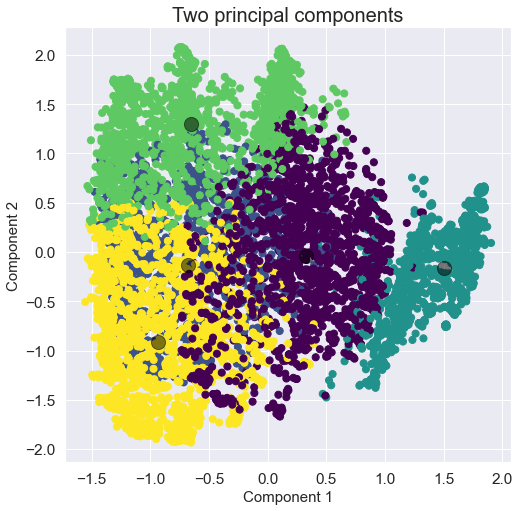

In [42]:
# Plot results two principal components
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_title('Two principal components', fontsize = 20)
ax.scatter(X_pca_reduced[:, 0], X_pca_reduced[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [43]:
# Create a dataframe with the weights per component
wheightsDF = pd.DataFrame(pca.components_,columns=X.columns)
wheightsDF

,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PRC_FULL_PAYMENT,TENURE,"BALANCE_BINS_(0.999, 2160.0]","BALANCE_BINS_(2160.0, 4319.0]","BALANCE_BINS_(4319.0, 6478.0]",...,"PURCHASES_TRX_BINS_(4319.0, 6478.0]","PURCHASES_TRX_BINS_(6478.0, 8637.0]","PAYMENTS_BINS_(0.999, 2160.0]","PAYMENTS_BINS_(2160.0, 4319.0]","PAYMENTS_BINS_(4319.0, 6478.0]","PAYMENTS_BINS_(6478.0, 8637.0]","MINIMUM_PAYMENTS_BINS_(0.999, 2160.0]","MINIMUM_PAYMENTS_BINS_(2160.0, 4319.0]","MINIMUM_PAYMENTS_BINS_(4319.0, 6478.0]","MINIMUM_PAYMENTS_BINS_(6478.0, 8637.0]"
0,2.576519e-02,-2.920105e-01,-9.887731e-02,8.057831e-02,9.808390e-04,-1.304769e-01,-1.710927e-02,-0.194519,-0.073485,0.107909,...,-0.150666,-0.155070,-0.028969,0.013402,0.000211,0.015356,-0.160828,-0.093423,0.132418,0.121833
1,9.874722e-02,1.869826e-01,1.719360e-01,2.828691e-02,6.233193e-02,-1.179616e-02,4.415216e-02,-0.261200,0.054144,0.001353,...,-0.051682,0.315314,-0.276245,-0.079335,0.104658,0.250923,-0.238398,0.030812,0.010512,0.197074
2,-1.240057e-02,-6.599321e-02,1.235801e-02,-5.545812e-02,-1.349543e-02,2.107033e-02,3.755738e-03,0.012106,0.093017,0.115345,...,-0.036262,-0.040429,0.066555,0.065110,-0.048178,-0.083487,0.015313,0.133859,0.073396,-0.222567
3,-3.225800e-02,-2.339574e-02,-5.419548e-02,3.676415e-02,4.900440e-02,-2.237728e-02,5.088856e-03,0.135746,-0.293983,-0.121740,...,0.097603,-0.157570,-0.034427,0.000744,0.039136,-0.005452,0.097440,-0.269216,-0.102451,0.274227
4,1.054664e-01,1.584504e-01,-1.536913e-02,-2.082833e-03,-3.353345e-02,-9.915315e-02,1.923465e-02,-0.096823,-0.261610,0.370452,...,0.315972,-0.050016,-0.133333,0.341097,-0.032928,-0.174837,-0.171640,-0.182570,0.340297,0.013913
5,3.026949e-02,-4.254564e-02,5.739507e-02,1.393536e-02,-6.502070e-03,-9.527495e-02,9.735161e-03,-0.214301,-0.008195,0.350909,...,-0.207232,0.065651,0.102983,-0.029026,-0.242642,0.168685,-0.218443,0.006579,0.364157,-0.152293
6,3.324308e-02,-6.810333e-02,-4.794282e-02,3.091858e-02,-1.612001e-02,1.307779e-02,2.042481e-02,-0.102911,0.272142,-0.021306,...,0.199242,-0.180419,-0.106557,0.155105,0.020412,-0.068960,-0.185135,0.376508,-0.060007,-0.131366
7,8.782723e-02,6.488897e-02,2.068613e-02,2.797497e-02,-7.845803e-03,-1.128677e-01,-1.584264e-02,-0.262670,0.330345,-0.144550,...,0.137707,-0.080749,0.109507,-0.157971,0.097342,-0.048878,-0.255213,0.294190,-0.183097,0.144119
8,-5.862469e-03,-1.239821e-01,4.485259e-03,-2.838377e-02,-1.564250e-03,-7.891010e-02,3.426238e-02,-0.061340,-0.002969,-0.036028,...,-0.284727,0.014283,-0.284360,0.230691,0.360029,-0.306360,-0.077833,0.016332,-0.064556,0.126057
9,-1.803926e-02,-5.935611e-02,1.990085e-02,-1.952337e-02,2.934749e-02,2.968052e-02,3.107033e-02,-0.016660,0.090659,-0.188307,...,-0.126911,-0.010261,-0.230629,0.490402,-0.543935,0.284162,-0.055397,0.113821,-0.114701,0.056277


In [44]:
# Study the weights of components
comp = abs(wheightsDF.iloc[21])  ## id 14 is component 14
comp = comp.sort_values(ascending=False)
comp

TENURE                                          0.803273
PRC_FULL_PAYMENT                                0.243928
MINIMUM_PAYMENTS_BINS_(6478.0, 8637.0]          0.190153
BALANCE_BINS_(6478.0, 8637.0]                   0.186644
PAYMENTS_BINS_(0.999, 2160.0]                   0.163342
MINIMUM_PAYMENTS_BINS_(2160.0, 4319.0]          0.143546
MINIMUM_PAYMENTS_BINS_(0.999, 2160.0]           0.137541
PAYMENTS_BINS_(6478.0, 8637.0]                  0.135878
BALANCE_BINS_(0.999, 2160.0]                    0.133856
BALANCE_BINS_(2160.0, 4319.0]                   0.133363
PURCHASES_BINS_(6478.0, 8637.0]                 0.120088
CASH_ADVANCE_BINS_(6478.0, 8637.0]              0.111974
PURCHASES_FREQUENCY                             0.107031
PURCHASES_TRX_BINS_(0.999, 2160.0]              0.104694
PURCHASES_BINS_(2160.0, 4319.0]                 0.091821
MINIMUM_PAYMENTS_BINS_(4319.0, 6478.0]          0.090934
BALANCE_BINS_(4319.0, 6478.0]                   0.080574
ONEOFF_PURCHASES_FREQUENCY     

In [45]:
# Check the mean values of each cluster for top 30 relevant featureslen()
top_features = comp[:30].index
clustersMeanDF = pd.DataFrame(X_beforeNorm[top_features].groupby(y_kmeans).mean(),columns=top_features)
clustersMeanDF.transpose()

,0,1,2,3,4
TENURE,11.151883,11.734990,11.376777,11.861045,11.600686
PRC_FULL_PAYMENT,0.071682,0.212749,0.044993,0.243021,0.254750
"MINIMUM_PAYMENTS_BINS_(6478.0, 8637.0]",0.376671,0.136646,0.305687,0.337292,0.073227
"BALANCE_BINS_(6478.0, 8637.0]",0.369380,0.095928,0.367773,0.353919,0.022883
"PAYMENTS_BINS_(0.999, 2160.0]",0.193803,0.319531,0.267773,0.011876,0.453661
"MINIMUM_PAYMENTS_BINS_(2160.0, 4319.0]",0.152491,0.284334,0.195735,0.345012,0.287185
"MINIMUM_PAYMENTS_BINS_(0.999, 2160.0]",0.147023,0.409248,0.118009,0.102732,0.516590
"PAYMENTS_BINS_(6478.0, 8637.0]",0.249089,0.097999,0.225118,0.619359,0.050915
"BALANCE_BINS_(0.999, 2160.0]",0.105711,0.478951,0.073460,0.045131,0.606979
"BALANCE_BINS_(2160.0, 4319.0]",0.218104,0.200828,0.203791,0.400238,0.231693
